In [22]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=d8566807bf60c5be6e090c885ab307ffbccb399618217af3110fba7908ea0c84
  Stored in directory: c:\users\김나영\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

### 38개 지역 스코어 데이터 및 425개 동의 중간값 데이터 로드 

In [10]:
df = pd.read_excel('data/score_median.xlsx')

In [11]:
# 인덱스를 동으로 맞춰서 뽑을수 있도록 조정
df = df.set_index('dong', drop=True, append=False)

In [12]:
df

,dong_code,safety_score_minmax,selfcare_score_minmax,leisure_score_minmax,traffic_score_minmax,consume_score_minmax,sum
dong,,,,,,,
역삼1동,1123064,6.505596,10.000000,8.698384,9.024968,10.000000,44.228949
서교동,1114066,6.097136,8.330126,8.698384,10.000000,10.000000,43.125647
논현2동,1123053,5.646436,9.279599,2.679119,5.584292,8.986459,32.175905
서초3동,1122053,7.331865,4.661213,2.978336,8.196490,8.438792,31.606697
삼성1동,1123058,5.780857,4.952087,3.836817,7.626870,7.460225,29.656856
양재1동,1122066,8.969647,3.825563,5.144363,5.464035,5.440755,28.844362
논현1동,1123052,4.986968,8.422111,2.896152,3.103981,8.627136,28.036349
양재2동,1122067,9.023206,2.165460,4.875985,5.433301,5.520625,27.018577
노량진1동,1120072,5.133006,2.290095,6.092965,7.711831,3.932365,25.160262


In [14]:
# 레이더 차트 스코어에 필요한 데이터만 가져오기
df2 = df.iloc[:, 1:6]

In [15]:
df2.head()

,safety_score_minmax,selfcare_score_minmax,leisure_score_minmax,traffic_score_minmax,consume_score_minmax
dong,,,,,
역삼1동,6.505596,10.000000,8.698384,9.024968,10.000000
서교동,6.097136,8.330126,8.698384,10.000000,10.000000
논현2동,5.646436,9.279599,2.679119,5.584292,8.986459
서초3동,7.331865,4.661213,2.978336,8.196490,8.438792
삼성1동,5.780857,4.952087,3.836817,7.626870,7.460225


In [16]:
# 위의 df2에서 특정 동만 가져올 수 있도록 작성 -> 다시 df2에 저장하고 칼럼을 재설정함
df2 = df2.loc[['공릉2동', '흑석동', '공덕동', '중간값']]
df2.reset_index()
df2.rename(columns={"safety_score_minmax":"밤길안녕지수",
                                        "selfcare_score_minmax": "Me코노미지수",
                                        "leisure_score_minmax": "유유자적지수",
                                        "traffic_score_minmax" : "통근왕지수",
                                        "consume_score_minmax" : "슬리퍼지수"}, inplace=True)

In [17]:
df2

,밤길안녕지수,Me코노미지수,유유자적지수,통근왕지수,슬리퍼지수
dong,,,,,
공릉2동,5.486919,1.596685,6.420723,4.944603,3.609722
흑석동,5.393207,2.091331,6.093730,6.227622,2.628626
공덕동,8.182793,2.689852,2.173490,2.810663,3.080855
중간값,4.493900,1.563694,2.059231,2.655745,2.134694


In [18]:
# 편하게 시각화 할수있도록 행열전환
df2 = df2.transpose()

In [19]:
df2

dong,공릉2동,흑석동,공덕동,중간값
밤길안녕지수,5.486919,5.393207,8.182793,4.493900
Me코노미지수,1.596685,2.091331,2.689852,1.563694
유유자적지수,6.420723,6.093730,2.173490,2.059231
통근왕지수,4.944603,6.227622,2.810663,2.655745
슬리퍼지수,3.609722,2.628626,3.080855,2.134694


## plotly 시각화

In [21]:
# 하나의 그래프만 띄워보기
import plotly.express as px
import pandas as pd
fig = px.line_polar(df2, r='공릉2동', theta=df2.index, line_close=True)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [24]:
# 두개의 그래프 동시에 겹쳐보기

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

# 기존 중간값 데이터 그래프로 깔아주기
fig.add_trace(go.Scatterpolar(
      r=df2['중간값'],
      theta=df2.index,
      fill='toself',
      name='중간값'
))

# 그위에 특정동 데이터 깔아주기
fig.add_trace(go.Scatterpolar(
      r=df2['공릉2동'],
      theta=df2.index,
      fill='toself',
      name='공릉2동'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 7], # 점수 만점 설정
    )),
  showlegend=False
)

#polar = dict(
#bgcolor=’#1e2130’
#),
#title = ‘MyRadar’,
#paper_bgcolor=’#1e2130’

fig.show()

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15

In [29]:
df2 = df2.transpose().reset_index()

In [30]:
df2

,dong,밤길안녕지수,Me코노미지수,유유자적지수,통근왕지수,슬리퍼지수
0,공릉2동,5.486919,1.596685,6.420723,4.944603,3.609722
1,흑석동,5.393207,2.091331,6.093730,6.227622,2.628626
2,공덕동,8.182793,2.689852,2.173490,2.810663,3.080855
3,중간값,4.493900,1.563694,2.543524,2.655745,2.134694


## matplotlib 시각화

In [34]:
# 기본 처리

categories = list(df2)[1:]

val_c1 = df2.loc[0].drop('dong').values.flatten().tolist() #dong 칼럼 설정
val_c1 += val_c1[:1]

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))  ]
angles += angles [:1]

In [23]:
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(polar=True))

plt.title(df2['dong'][0]) # 타이틀 이름 설정 -> dong이름으로 함
plt.xticks(angles[:-1],categories,color='grey',size=15)
plt.yticks(np.arange(1,10), ['1','2','3','4','5','6','7','8','9'],color='grey',size=12) # 백그라운드 설정 / 10점 만점 기준
plt.ylim(0,10) # 10점으로 단위 생성
ax.set_rlabel_position(30)

# 특정 동 시각화
val_c1 = df2.loc[0].drop('dong').values.flatten().tolist()
val_c1 += val_c1[:1] 
ax.plot(angles, val_c1, linewidth=1, linestyle='solid', label='공릉2동') 
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# 중간값 시각화
val_c2 = df2.loc[3].drop('dong').values.flatten().tolist() # 3번째 행으로 설정(중간값 행)
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1, linestyle='solid', label='중간값')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

NameError: name 'plt' is not defined

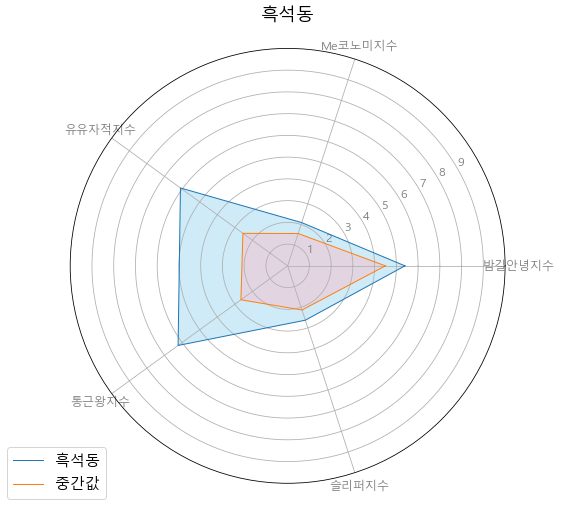

In [56]:
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(polar=True))

plt.title(df2['dong'][1])
plt.xticks(angles[:-1],categories,color='grey',size=12)
plt.yticks(np.arange(1,10), ['1','2','3','4','5','6','7','8','9'],color='grey',size=12)
plt.ylim(0,10)
ax.set_rlabel_position(30)

val_c1 = df2.loc[1].drop('dong').values.flatten().tolist() 
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1, linestyle='solid', label='흑석동')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

val_c2 = df2.loc[3].drop('dong').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1, linestyle='solid', label='중간값')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

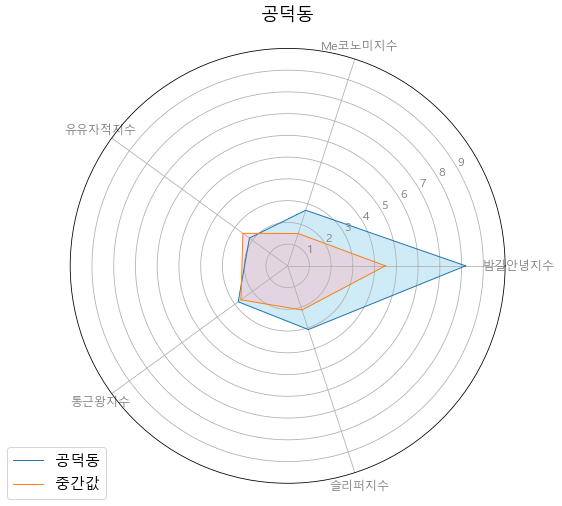

In [57]:
fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(polar=True))

plt.title(df2['dong'][2])
plt.xticks(angles[:-1],categories,color='grey',size=12)
plt.yticks(np.arange(1,10), ['1','2','3','4','5','6','7','8','9'],color='grey',size=12)
plt.ylim(0,10)
ax.set_rlabel_position(30)

val_c1 = df2.loc[2].drop('dong').values.flatten().tolist() 
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1, linestyle='solid', label='공덕동')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

val_c2 = df2.loc[3].drop('dong').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1, linestyle='solid', label='중간값')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()